In [2]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('/Users/acannon/Dropbox')
import seaborn as sns
sns.set_theme()
sns.set_palette('colorblind')
import warnings
warnings.filterwarnings('ignore')

In [7]:
file_path = 'diss_data/clean_hp.xlsx'
df_hp = pd.read_excel(file_path)

# the differences start in column 118 (so 119 in python)
# the indicators start in column 233 (so 234 in python)

pdummy = df_hp.filter(regex = "Ip$")

In [8]:
pdummy.head()

diff_index = pdummy.mean(axis = 1)

<AxesSubplot:>

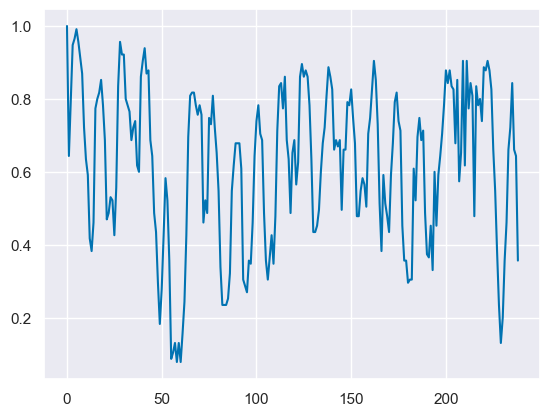

In [9]:
type(diff_index)
diff_index.plot.line(x = df_hp['period'])

In [11]:
df_indicators = pd.read_excel('diss_data/more.xlsx')